# Imports

In [86]:
import numpy as np

np.random.seed(1337)  # for reproducibility
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics._regression import r2_score, mean_squared_error ,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

from dbn import SupervisedDBNRegression
import matplotlib.pyplot as plt 
import os
import sys 
import time

In [28]:
df = pd.read_csv('./data/NSE50.csv')

In [29]:
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']

In [30]:
df.drop(df[df['High']==df['Low']].index , axis=0 , inplace=True)

In [31]:
data = df['Close'].copy()

In [32]:
# Training and testing data
train_size = len(data) - 66
train = data[:train_size]
test = data[train_size :]

In [33]:
backcheck = 60
X_train , y_train = [] , []
for i in range(backcheck , len(train)):
    X_train.append(train[i-backcheck : i ])
    y_train.append(train[i ])

In [34]:
# Training
X_train = np.array(X_train)
y_train = np.array(y_train)

In [35]:
regressor = SupervisedDBNRegression(hidden_layers_structure=[120],
                                    learning_rate_rbm=0.0001,
                                    learning_rate=0.0001,
                                    n_epochs_rbm=2000,
                                    n_iter_backprop=2000,
                                    batch_size=64,
                                    activation_function='relu')

regressor.fit(X_train, y_train)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 2 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 3 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 4 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 5 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 6 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 7 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 8 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 9 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 10 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 11 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 12 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 13 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 14 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 15 finished 	RBM Reconstruction error 1916922309.517497
>> Epoc

>> Epoch 127 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 128 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 129 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 130 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 131 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 132 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 133 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 134 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 135 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 136 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 137 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 138 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 139 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 140 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 141 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 1

>> Epoch 252 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 253 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 254 finished 	RBM Reconstruction error 1916922309.517497
>> Epoch 255 finished 	RBM Reconstruction error 1916922309.517497


KeyboardInterrupt: 

In [ ]:
scaled_test = scaler.transform(np.array(test).reshape(-1,1))

In [50]:
backcheck = 60
X_test , y_test = [] , []
for i in range(backcheck , len(scaled_test)):
    X_test.append(scaled_test[i-backcheck : i ,0])
    y_test.append(scaled_test[i],0)
    
# Training
X_test = np.array(X_test)
y_test = np.array(y_test)

In [51]:
predictions = regressor.predict(X_test)

In [52]:
mean_squared_error(y_test , predictions)

104393148.40339594

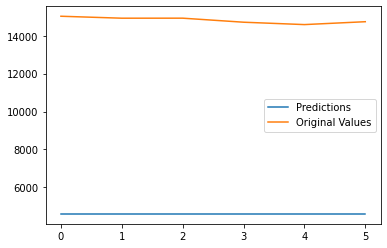

In [53]:
plt.plot(predictions , label='Predictions')
plt.plot(y_test , label = 'Original Values')
plt.legend()
plt.show()

## Scaling training and testing data

In [36]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(np.array(train).reshape(-1,1))

In [37]:
backcheck = 60
X_train , y_train = [] , []
for i in range(backcheck , len(scaled_train)):
    X_train.append(scaled_train[i-backcheck : i ,0])
    y_train.append(scaled_train[i,0])

In [38]:
scaled_test = scaler.transform(np.array(test).reshape(-1,1))

In [39]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [40]:
print(X_train.shape)
print(y_train.shape)

(6097, 60)
(6097,)


In [41]:
regressor = SupervisedDBNRegression(hidden_layers_structure=[100],
                                    learning_rate_rbm=0.001,
                                    learning_rate=0.001,
                                    n_epochs_rbm=60,
                                    n_iter_backprop=100,
                                    batch_size=32,
                                    activation_function='relu')


In [42]:
regressor.fit(X_train , y_train)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 2.170569
>> Epoch 2 finished 	RBM Reconstruction error 0.318780
>> Epoch 3 finished 	RBM Reconstruction error 0.318929
>> Epoch 4 finished 	RBM Reconstruction error 0.349805
>> Epoch 5 finished 	RBM Reconstruction error 0.307079
>> Epoch 6 finished 	RBM Reconstruction error 0.381365
>> Epoch 7 finished 	RBM Reconstruction error 0.361000
>> Epoch 8 finished 	RBM Reconstruction error 0.372109
>> Epoch 9 finished 	RBM Reconstruction error 0.385718
>> Epoch 10 finished 	RBM Reconstruction error 0.417606
>> Epoch 11 finished 	RBM Reconstruction error 0.385918
>> Epoch 12 finished 	RBM Reconstruction error 0.418794
>> Epoch 13 finished 	RBM Reconstruction error 0.409947
>> Epoch 14 finished 	RBM Reconstruction error 0.424065
>> Epoch 15 finished 	RBM Reconstruction error 0.457718
>> Epoch 16 finished 	RBM Reconstruction error 0.463594
>> Epoch 17 finished 	RBM Reconstruction error 0.470952
>> Epoch 18 finished 	RBM Reco

>> Epoch 99 finished 	ANN training loss 0.000638
>> Epoch 100 finished 	ANN training loss 0.000637
[END] Fine tuning step


SupervisedDBNRegression()

In [43]:
test = scaler.transform(np.array(test).reshape(-1,1))

In [62]:
backcheck = 60
X_test , y_test = [] , []
for i in range(backcheck , len(test)):
    X_test.append(test[i-backcheck : i,0])
    y_test.append(test[i ,0])
    
X_test = np.array(X_test)
y_test = np.array(y_test)

In [63]:
preds = regressor.predict(X_test)

In [71]:
print(scaler.inverse_transform(preds))
print(scaler.inverse_transform(np.array(y_test).reshape(-1,1)))

[[14688.47889032]
 [14699.52995842]
 [14724.876023  ]
 [14758.52439907]
 [14770.99131005]
 [14804.03265951]]
[[15023.9502]
 [14920.9004]
 [14922.    ]
 [14709.25  ]
 [14583.7002]
 [14735.7002]]


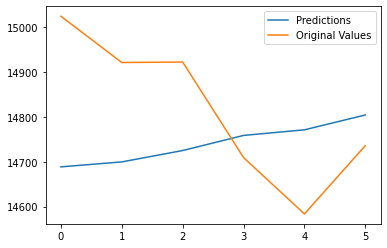

In [72]:
plt.plot(scaler.inverse_transform(preds) , label='Predictions')
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1)), label = 'Original Values')
plt.legend()
plt.show()

In [74]:
regressor.save('./models/NSE501.pkl')

In [84]:
t = scaler.inverse_transform(np.array(y_test).reshape(-1,1))
p =  scaler.inverse_transform(preds)

In [91]:
r2_score(t,p)

-0.7669073552124397

In [93]:
mean_squared_error(t , p)

40429.83094290415

In [95]:
mean_absolute_error(t  ,p)

176.4772828135559

### Increasing Testing size

In [96]:
train_size = int(len(data)*0.80)
test = data[train_size :]

In [97]:
scaled_test = scaler.transform(np.array(test).reshape(-1,1))

In [98]:
backcheck = 60
X_test , y_test = [] , []
for i in range(backcheck , len(scaled_test)):
    X_test.append(scaled_test[i-backcheck : i,0])
    y_test.append(scaled_test[i ,0])
    
X_test = np.array(X_test)
y_test = np.array(y_test)

In [99]:
new_predictions = regressor.predict(X_test)

In [102]:
len(new_predictions)

1185

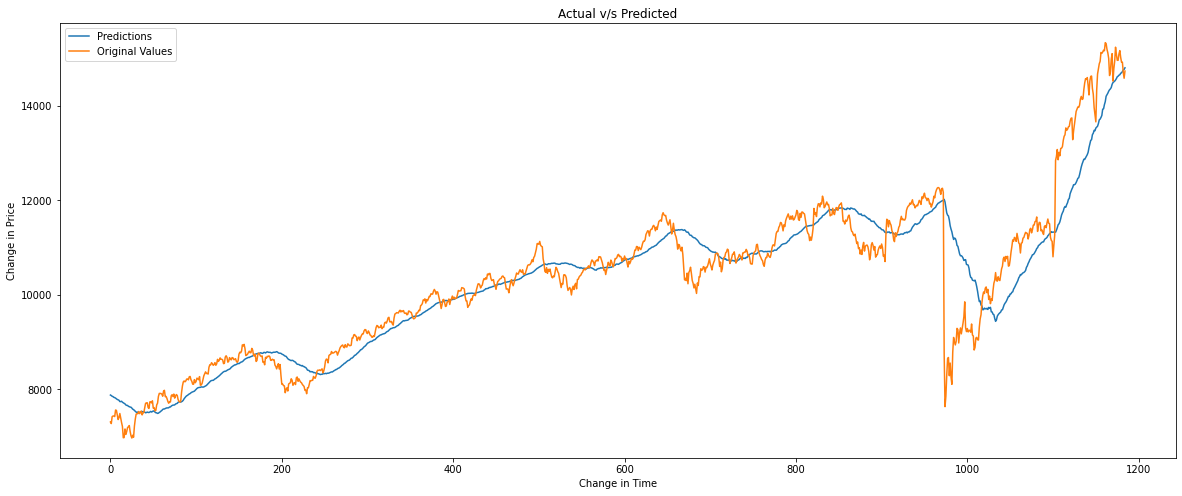

In [101]:
plt.figure(figsize=(20,8))
plt.title('Actual v/s Predicted')
plt.plot(scaler.inverse_transform(new_predictions) , label='Predictions')
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1)), label = 'Original Values')
plt.xlabel('Change in Time')
plt.ylabel('Change in Price')
plt.legend()
plt.show()

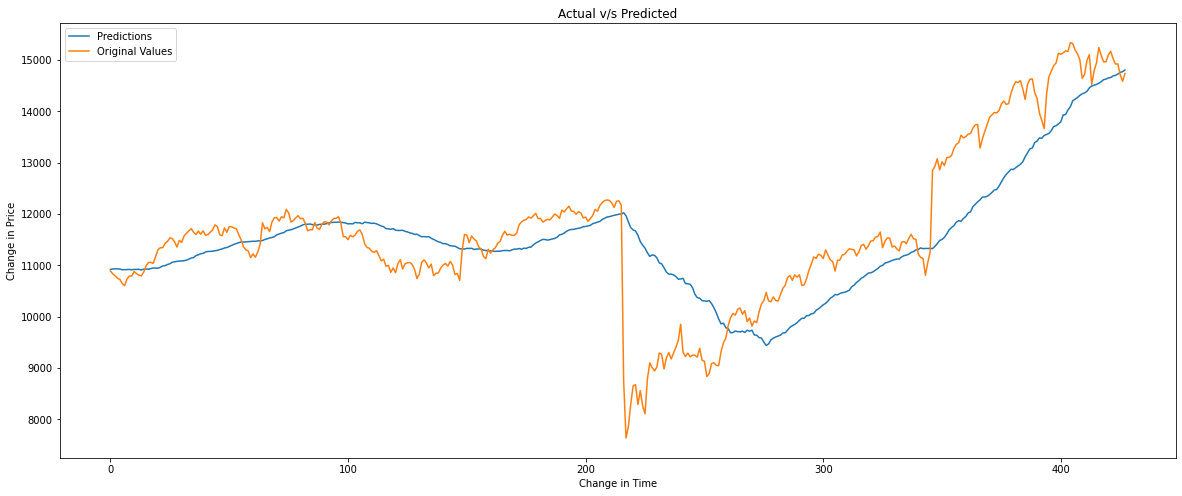

In [103]:
plt.figure(figsize=(20,8))
plt.title('Actual v/s Predicted')
plt.plot(scaler.inverse_transform(new_predictions)[757:] , label='Predictions')
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1))[757:], label = 'Original Values')
plt.xlabel('Change in Time')
plt.ylabel('Change in Price')
plt.legend()
plt.show()